In [9]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Barabási–Albert Network Model
#### by Aleksander Molak (2017)
#### aleksander.molak@gmail.com

**[Barabási–Albert model](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model)** is an algorithm for generating random scale-free networks using a preferential attachment mechanism. 

The following implementation uses **[Networkx](https://networkx.org/)** library.

In [10]:
COLOR = '#40a6d1'

## Define helper functions

In [11]:
# Plotting

def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

In [12]:
# BA algo functions

def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        #print(node_degr)
        node_proba = node_degr / (2 * len(G.edges()))
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    #print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node

def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            print("!ככה לא בונים חומה")
            add_edge()
        else:
            print("!מזל טוב")
            G.add_edge(new_node, random_proba_node)
            print("Edge added: {} {}".format(new_node + 1, random_proba_node))

## BA Algorithm

In [22]:
print("***\nWelcome to Barabási–Albert (BA) model simulation\nAuthor: Aleksander Molak (2017)\n!איזה כיף\n\n")

# Get parameters
init_nodes = int(input("Please type in the initial number of nodes (m_0): "))
final_nodes = int(input("\nPlease type in the final number of nodes: "))
m_parameter = int(input("\nPlease type in the value of m parameter (m<=m_0): "))

print("\n")
print("Creating initial graph...")

G = nx.complete_graph(init_nodes)

print("Graph created. Number of nodes: {}".format(len(G.nodes())))
print("Adding nodes...")

count = 0
new_node = init_nodes

for f in range(final_nodes - init_nodes):
    print("----------> Step {} <----------".format(count))
    G.add_node(init_nodes + count)
    print("Node added: {}".format(init_nodes + count + 1))
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1


print("\nFinal number of nodes ({}) reached".format(len(G.nodes())))

***
Welcome to Barabási–Albert (BA) model simulation
Author: Aleksander Molak (2017)
!איזה כיף




Creating initial graph...
Graph created. Number of nodes: 15
Adding nodes...

Final number of nodes (15) reached


## Plot

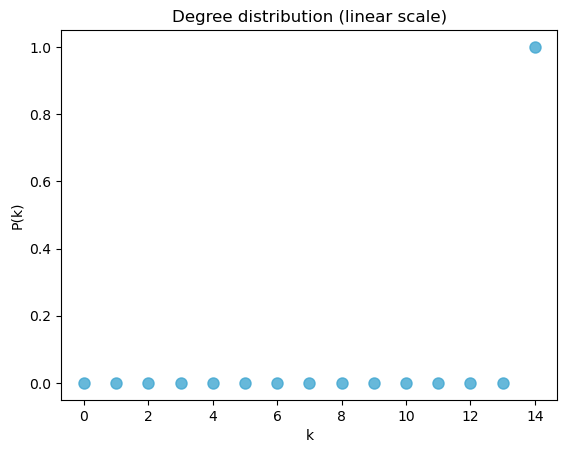

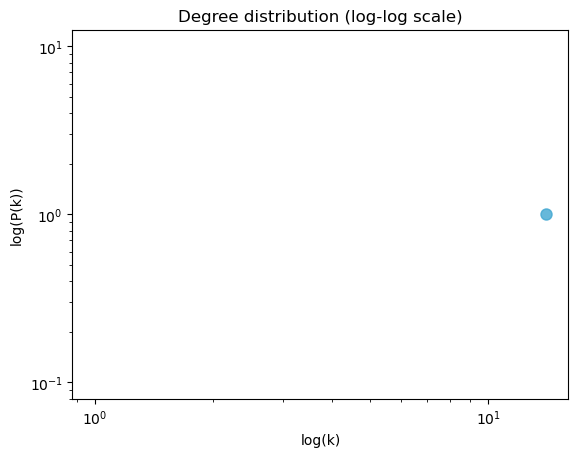

(None, None)

In [23]:
k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)

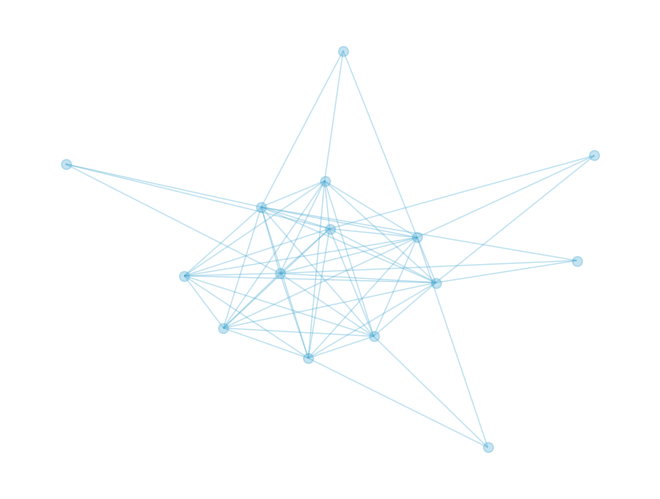

In [21]:
# Plot the network
nx.draw(G, alpha = .3, edge_color = COLOR, node_color = COLOR, node_size=50)